Run TFlite inference on an my dataset


In [11]:
import pandas as pd
import numpy as np
import tflite_runtime.interpreter as tflite
import matplotlib.pyplot as plt


ROWS_PER_FRAME = 543 # number of landmarks per frame

def load_relevant_data_subset(pq_path):
    data_columns = ['x', 'y', 'z']
    data = pd.read_parquet(pq_path, columns=data_columns)
    n_frames = int(len(data) / ROWS_PER_FRAME)
    data = data.values.reshape(n_frames, ROWS_PER_FRAME, len(data_columns))
    return data.astype(np.float32)

In [2]:
interpreter = tflite.Interpreter("./model.tflite")
found_signatures = list(interpreter.get_signature_list().keys())
prediction_fn = interpreter.get_signature_runner("serving_default")

In [3]:
# Add ordinally Encoded Sign (assign number to each sign name)
train = pd.read_csv('./asl-signs/train.csv')
train['sign_ord'] = train['sign'].astype('category').cat.codes

# Dictionaries to translate sign <-> ordinal encoded sign
SIGN2ORD = train[['sign', 'sign_ord']].set_index('sign').squeeze().to_dict()
ORD2SIGN = train[['sign_ord', 'sign']].set_index('sign_ord').squeeze().to_dict()

pq_file = 'output.parquet'
xyz_np = load_relevant_data_subset(pq_file)
prediction = prediction_fn(inputs=xyz_np)
sign = prediction['outputs'].argmax()



In [5]:
ORD2SIGN[sign]

'another'

In [6]:
len(xyz_np)

23

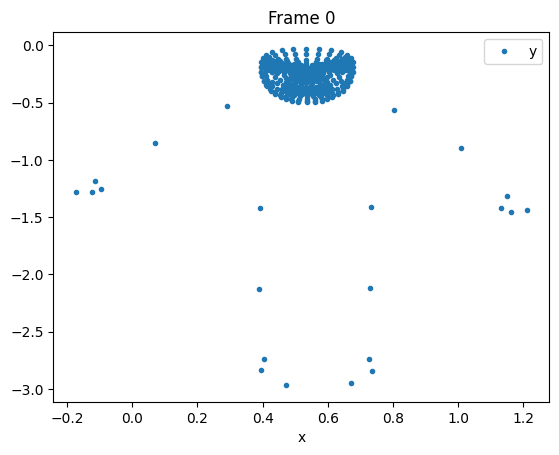

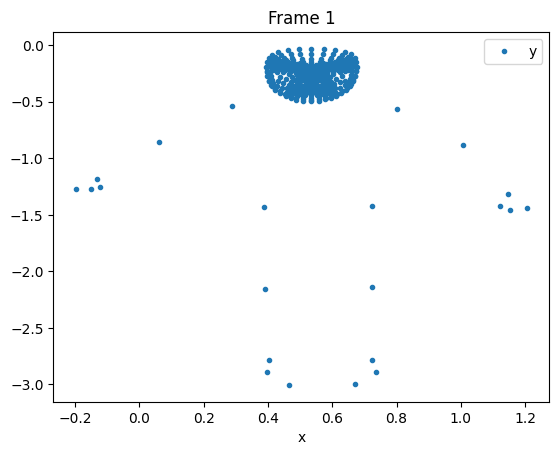

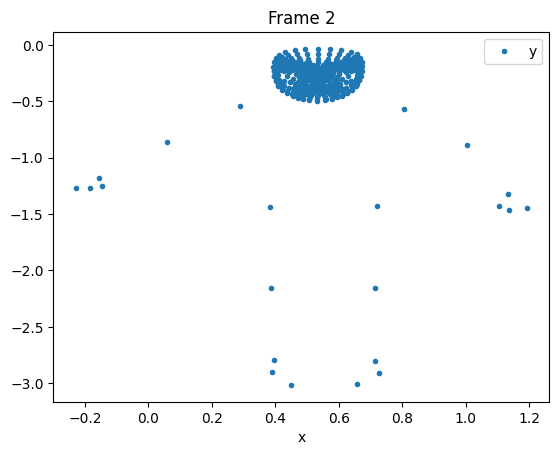

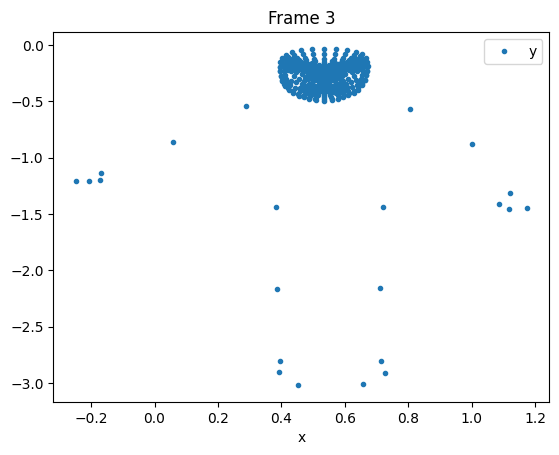

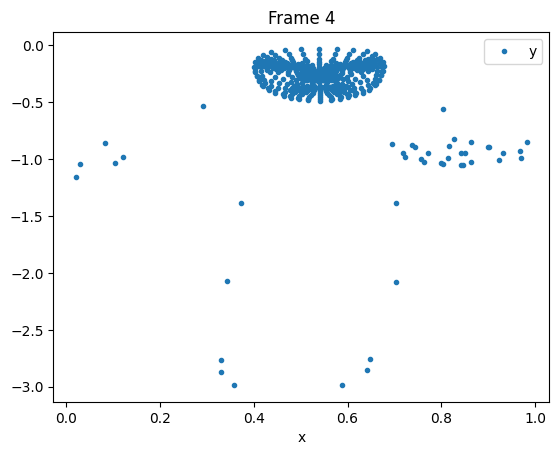

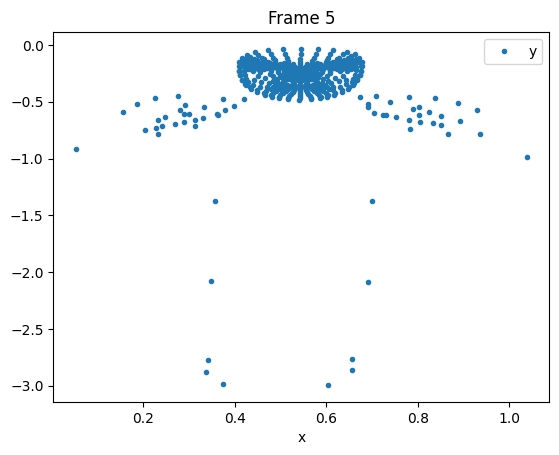

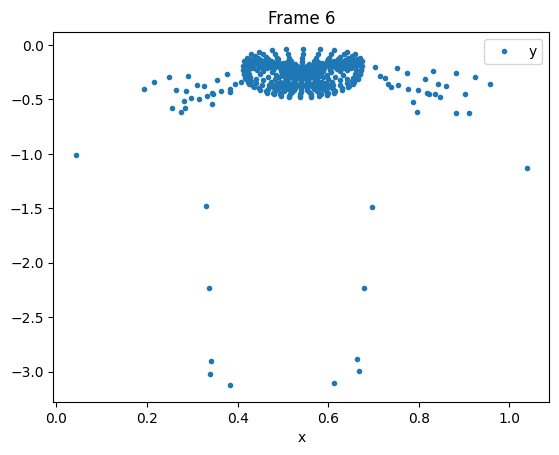

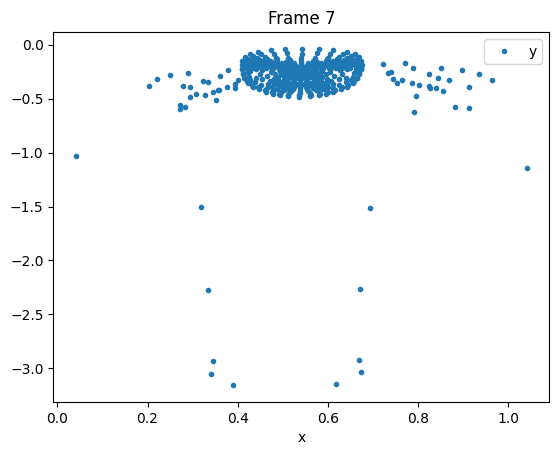

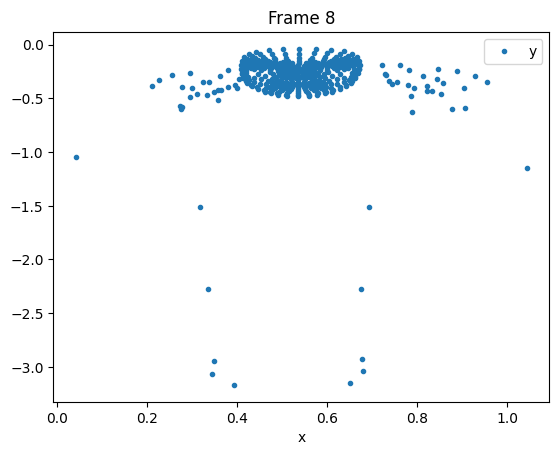

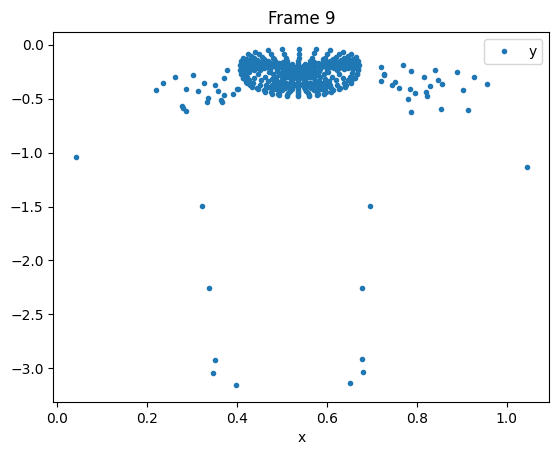

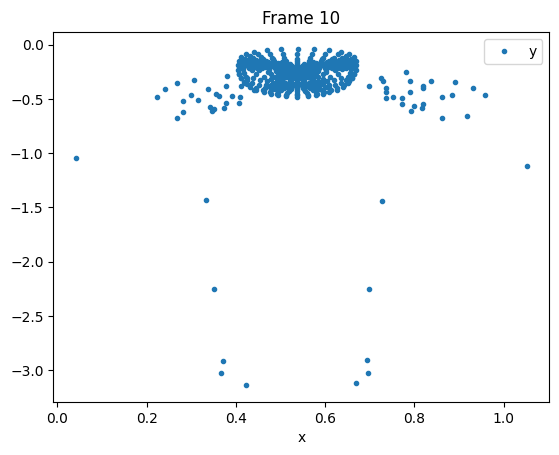

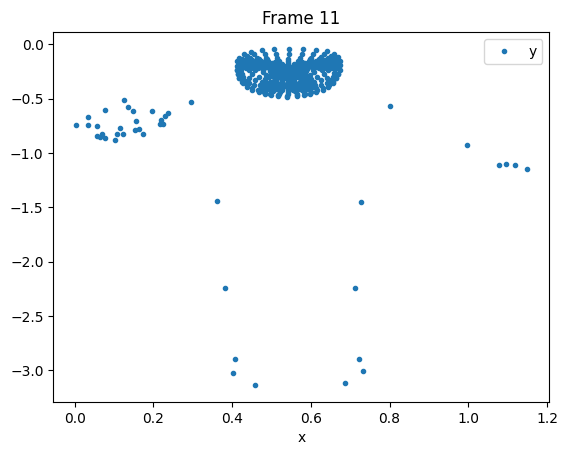

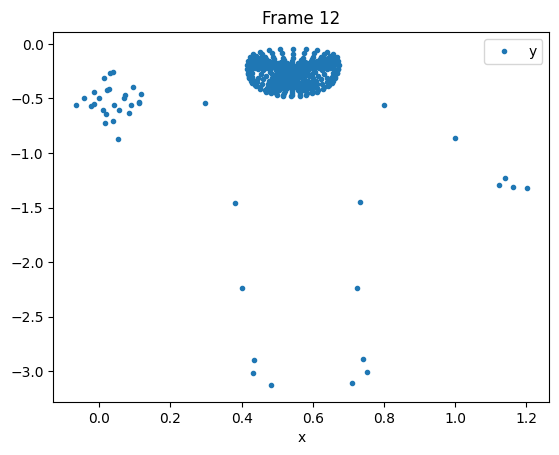

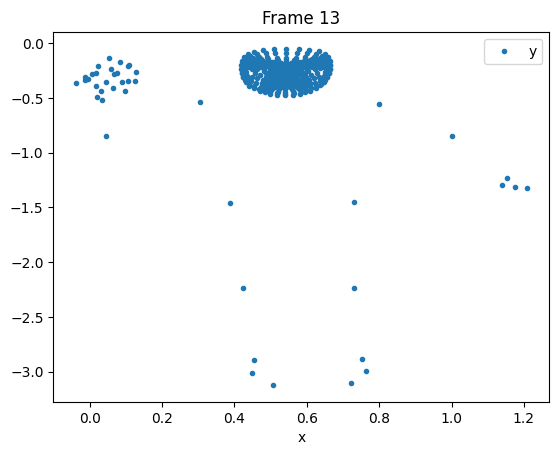

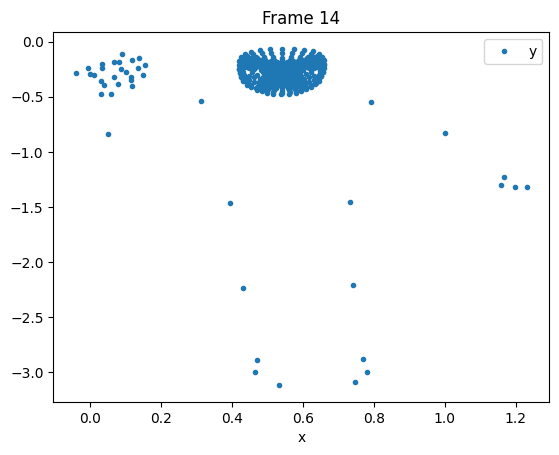

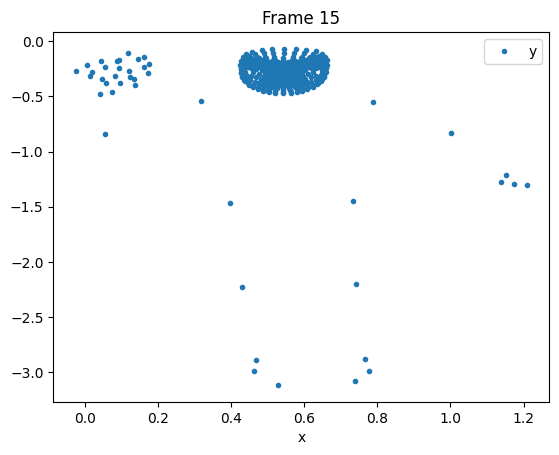

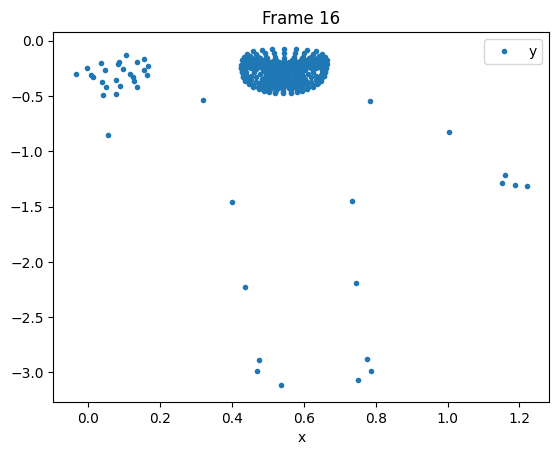

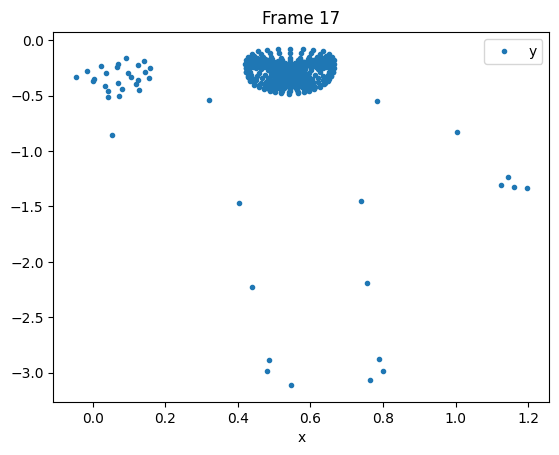

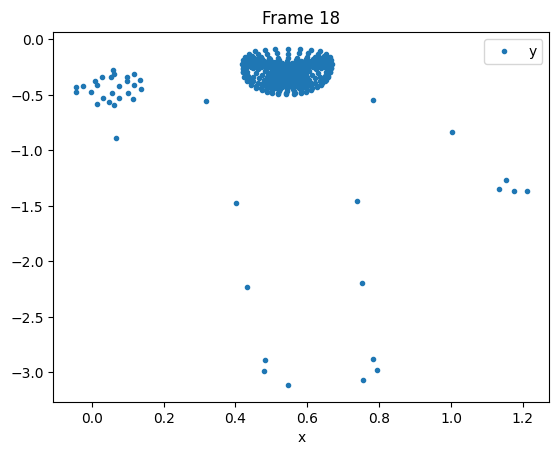

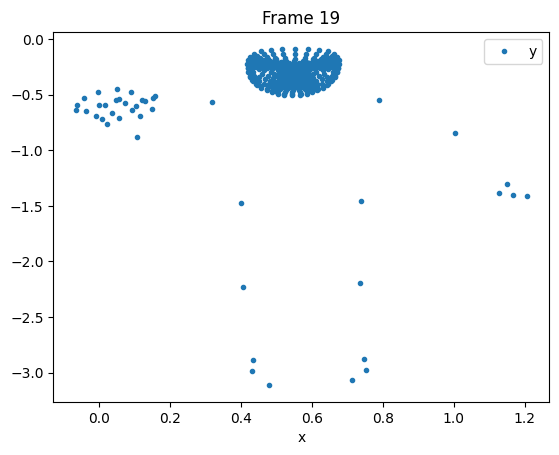

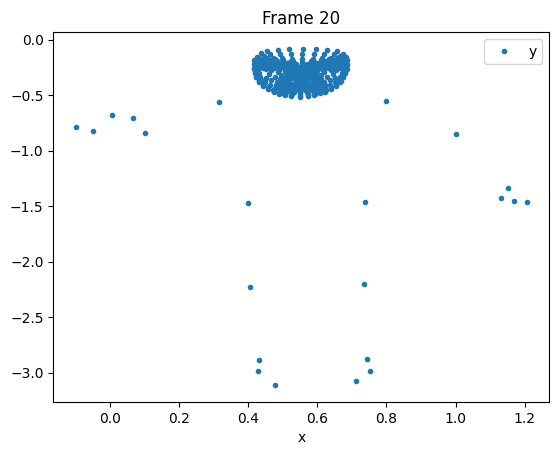

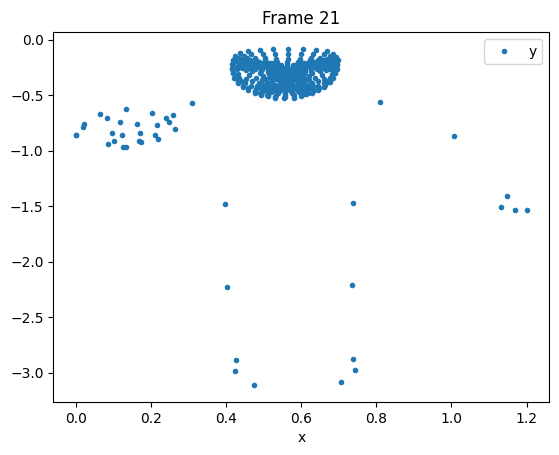

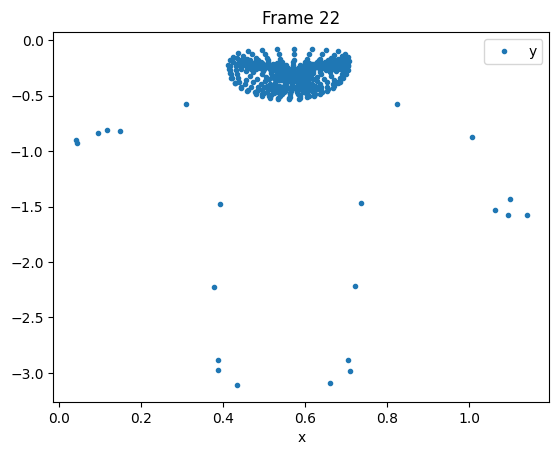

In [12]:
for frame, data in enumerate(xyz_np):
    df_temp = pd.DataFrame(data, columns=['x', 'y', 'z'])
    df_temp['y'] = -df_temp['y']
    df_temp.plot(x='x', y = 'y', style='.')
    plt.title(f'Frame {frame}')
    plt.show()